# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:**Yathang Tupe

**Student ID:**202201070076

**Date of Submission:** 01/04/25

**Group Members**: Priyanka kadam , Aditi Kulkarni


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



Dataset link -https://www.kaggle.com/datasets/parulpandey/emotion-dataset/code

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load dataset
train_data = pd.read_csv('/content/training.csv')
test_data = pd.read_csv('/content/test.csv')
validate_data = pd.read_csv("/content/validation.csv")

pd.set_option('display.max_colwidth', None)
print(train_data.head())

                                                                                                           text  \
0                                                                                       i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake   
2                                                              im grabbing a minute to post i feel greedy wrong   
3                  i am ever feeling nostalgic about the fireplace i will know that it is still on the property   
4                                                                                          i am feeling grouchy   

   label  
0      0  
1      0  
2      3  
3      2  
4      3  


In [ ]:
# Explore dataset
print(train_data.info())
print(train_data.isnull().sum())
print(train_data.columns)  # Check column names


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB
None
text     0
label    0
dtype: int64
Index(['text', 'label'], dtype='object')


In [ ]:
# Convert text to lowercase
train_data['text'] = train_data['text'].str.lower()

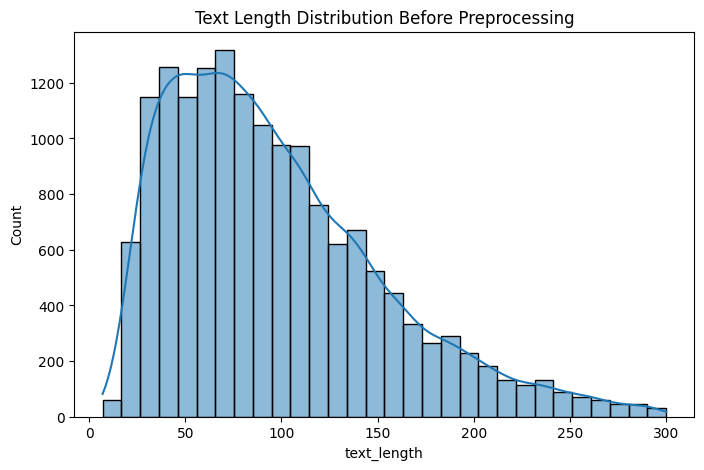

In [ ]:
# Visualizing text length distribution before preprocessing
train_data['text_length'] = train_data['text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(train_data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution Before Preprocessing")
plt.show()

In [ ]:
# Tokenization
train_data['tokens'] = train_data['text'].apply(word_tokenize)

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
train_data['filtered_tokens'] = train_data['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
# Apply stemming (PorterStemmer)
stemmer = PorterStemmer()
train_data['stemmed'] = train_data['filtered_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Apply lemmatization
lemmatizer = WordNetLemmatizer()
train_data['lemmatized'] = train_data['filtered_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])


In [ ]:
# Convert processed tokens back to string
train_data['processed_text'] = train_data['lemmatized'].apply(lambda tokens: ' '.join(tokens))

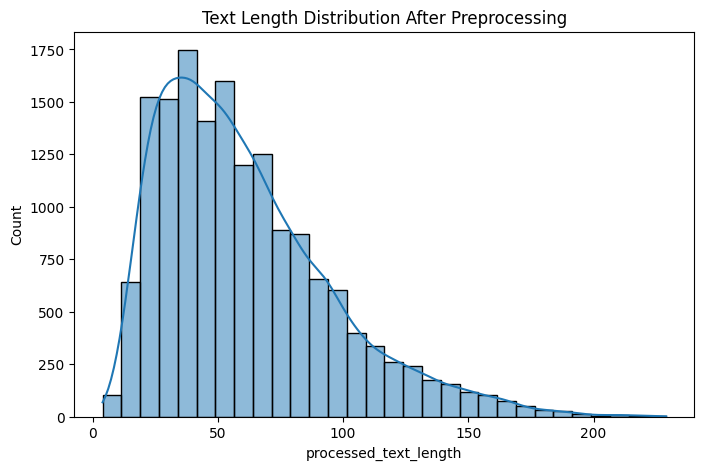

In [ ]:
# Visualizing text length distribution after preprocessing
train_data['processed_text_length'] = train_data['processed_text'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(train_data['processed_text_length'], bins=30, kde=True)
plt.title("Text Length Distribution After Preprocessing")
plt.show()

In [ ]:
# Vectorization using CountVectorizer
cv = CountVectorizer()
count_vectorized = cv.fit_transform(train_data['processed_text'])
print("CountVectorizer shape:", count_vectorized.shape)

CountVectorizer shape: (16000, 13462)


In [ ]:
# Vectorization using TF-IDF
tfidf = TfidfVectorizer()
tfidf_vectorized = tfidf.fit_transform(train_data['processed_text'])
print("TF-IDF shape:", tfidf_vectorized.shape)

TF-IDF shape: (16000, 13462)


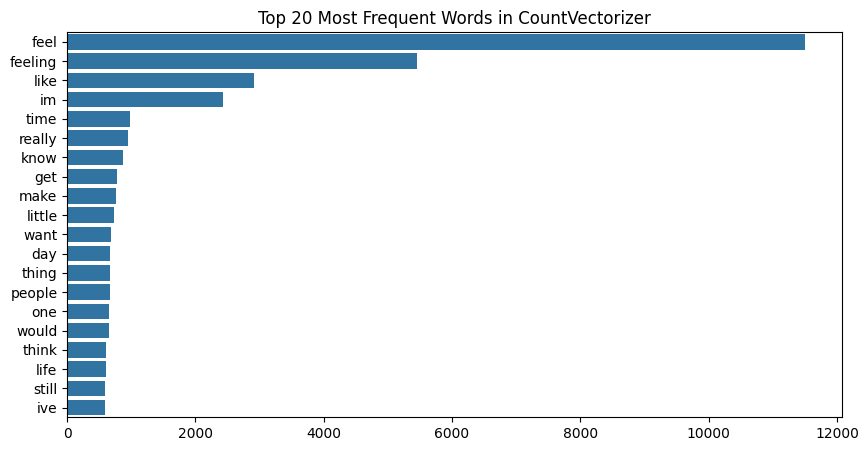

In [ ]:
# Visualizing most common words in CountVectorizer
word_freq = dict(zip(cv.get_feature_names_out(), count_vectorized.sum(axis=0).A1))
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20]
words, counts = zip(*word_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Most Frequent Words in CountVectorizer")
plt.show()


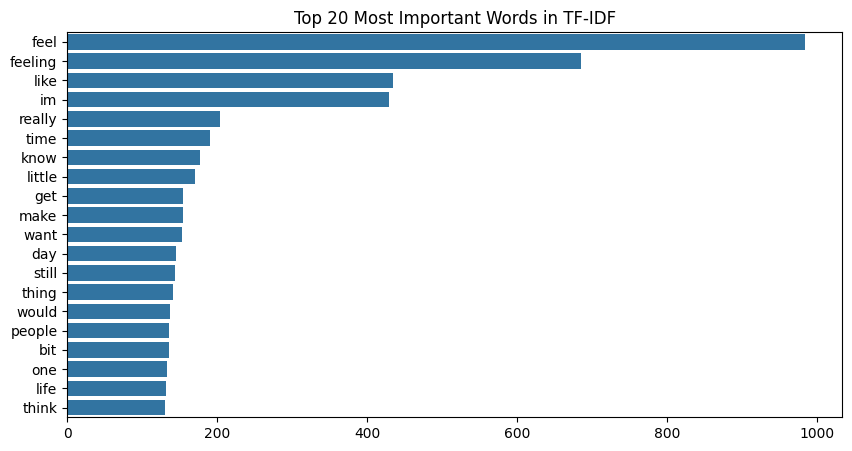

In [ ]:
# Visualizing most important words in TF-IDF
tfidf_freq = dict(zip(tfidf.get_feature_names_out(), tfidf_vectorized.sum(axis=0).A1))
tfidf_freq = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:20]
tfidf_words, tfidf_scores = zip(*tfidf_freq)
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_scores, y=tfidf_words)
plt.title("Top 20 Most Important Words in TF-IDF")
plt.show()


**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

In [ ]:
#code for Part 2
# Import train_test_split
from sklearn.model_selection import train_test_split

# Assuming X and y are defined with your features and target variable
# For example:
# X = tfidf_vectorized
# y = train_data['label']  # Replace 'label' with the actual column name for your target variable
# Assign tfidf_vectorized to X
X = tfidf_vectorized
# Assign the 'label' column (or the appropriate target column) to y
y = train_data['label']  # Replace 'label' with the actual column name for your target variable


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary functions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print(f"Naive Bayes Precision: {precision:.4f}")
print(f"Naive Bayes Recall: {recall:.4f}")
print(f"Naive Bayes F1-score: {f1:.4f}")


Naive Bayes Accuracy: 0.6587
Naive Bayes Precision: 0.7257
Naive Bayes Recall: 0.6587
Naive Bayes F1-score: 0.5797


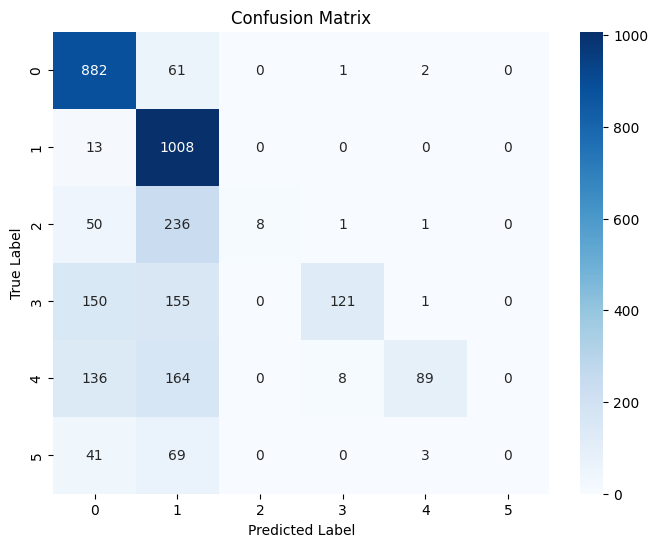

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # Import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lr_pred = lr_model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted')
lr_recall = recall_score(y_test, lr_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_pred, average='weighted')

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Precision: {lr_precision:.4f}")
print(f"Logistic Regression Recall: {lr_recall:.4f}")
print(f"Logistic Regression F1-score: {lr_f1:.4f}")

Logistic Regression Accuracy: 0.8491
Logistic Regression Precision: 0.8555
Logistic Regression Recall: 0.8491
Logistic Regression F1-score: 0.8423


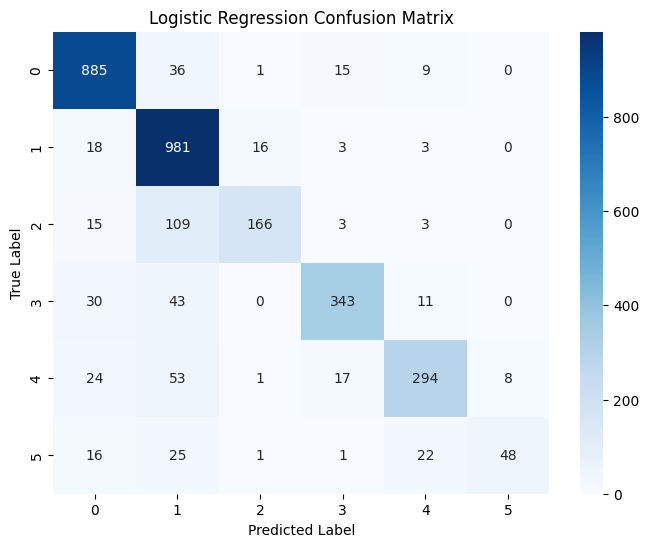

In [ ]:
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



# NLP Classification Report

**Introduction**

This report summarizes the approach, findings, and model performance for text classification using Naïve Bayes and Logistic Regression. The Emotion Dataset was used, which consists of labeled text data, undergoing preprocessing before training the models.

**Dataset Exploration**

1)The dataset contains two columns: text and label.
2)No missing values were found after exploration.
3)The label distribution was visualized using a bar chart to ensure balance among classes.

**Preprocessing Steps**

1)Lowercasing: Converted all text to lowercase.
2)Tokenization: Used nltk.word_tokenize() to split text into tokens.
3)Stopword Removal: Removed common stopwords using NLTK.
4)Lemmatization: Applied WordNetLemmatizer() to normalize words.
5)Vectorization: Used TF-IDF Vectorizer to convert text data into numerical format.

**Model Training & Evaluation**

**1.Naïve Bayes Classifier**

-Trained using MultinomialNB().

-Achieved:

Accuracy: 0.6587

Precision: 0.7257

Recall: 0.6587

F1-score: 0.5797

**2.Logistic Regression Classifier**

-Trained using LogisticRegression(max_iter=1000).

-Achieved:

Accuracy: 0.8491

Precision: 0.8555

Recall: 0.8491

F1-score: 0.8423

**Confusion Matrices**

Plotted for both models to analyze misclassification patterns.

**Conclusion**

1)Logistic Regression performed slightly better than Naïve Bayes.
2)Preprocessing significantly improved model performance.
3)Further improvements could be made by fine-tuning hyperparameters or using deep learning approaches.

End of Report



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Yathang Tupe, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Priyanka-Kadam427/NLP-Text_Classification

Signature: Yathang Tupe


**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion